In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [5]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-05-30--16h-36m-59s',
 '2025-05-30--16h-47m-54s',
 '2025-05-30--16h-59m-13s',
 '2025-05-30--17h-10m-25s',
 '2025-05-30--17h-21m-43s',
 '2025-05-30--17h-32m-55s',
 '2025-05-30--17h-44m-10s',
 '2025-05-30--17h-55m-50s',
 '2025-05-30--18h-07m-11s',
 '2025-05-30--18h-19m-07s',
 '2025-05-30--18h-30m-37s',
 '2025-05-30--18h-42m-09s',
 '2025-05-30--18h-53m-42s',
 '2025-05-30--19h-05m-11s',
 '2025-05-30--19h-16m-29s',
 '2025-05-30--19h-27m-46s',
 '2025-05-30--19h-39m-00s',
 '2025-05-30--19h-50m-24s',
 '2025-05-30--20h-02m-11s',
 '2025-05-30--20h-13m-17s',
 '2025-05-30--20h-24m-19s',
 '2025-05-30--20h-36m-00s',
 '2025-05-30--20h-47m-21s',
 '2025-05-30--20h-59m-00s',
 '2025-05-30--21h-10m-02s',
 '2025-05-30--21h-20m-52s',
 '2025-05-30--21h-32m-50s',
 '2025-05-30--21h-44m-02s',
 '2025-05-30--21h-55m-28s',
 '2025-05-30--22h-06m-26s',
 '2025-05-30--22h-17m-53s',
 '2025-05-30--22h-29m-02s',
 '2025-05-30--22h-40m-13s',
 '2025-05-30--22h-51m-09s',
 '2025-05-30--23h-01m-44s',
 '2025-05-30--23h-12

In [6]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    estimates["repetitions"] = params["repetitions"].values[0]
    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions
0,2025-05-30--16h-36m-59s,0.5,40.0,0.0,0.0,40.5,NaN,0.157297,1.570796,0.000000,0.000000,30000
1,2025-05-30--16h-36m-59s,0.5,40.0,0.0,0.0,40.5,NaN,0.157297,1.570796,0.000000,0.000000,30000
2,2025-05-30--16h-36m-59s,1.0,38.0,0.0,0.0,39.0,NaN,0.226942,1.570796,0.000000,0.000000,30000
3,2025-05-30--16h-36m-59s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,30000
4,2025-05-30--16h-36m-59s,0.5,40.0,0.0,0.0,40.5,NaN,0.157297,1.570796,0.000000,0.000000,30000
...,...,...,...,...,...,...,...,...,...,...,...,...
155470,2025-06-01--02h-34m-20s,101.5,48.0,48.0,0.5,198.0,NaN,1.570796,1.500725,1.570796,1.570796,30000
155471,2025-06-01--02h-34m-20s,93.0,51.0,55.0,1.5,200.5,NaN,1.590748,1.444472,1.570796,1.570796,30000
155472,2025-06-01--02h-34m-20s,97.0,55.0,46.0,2.0,200.0,NaN,1.525781,1.428180,1.570796,1.570796,30000
155473,2025-06-01--02h-34m-20s,97.5,46.0,52.0,1.5,197.0,NaN,1.601258,1.447392,1.570796,1.570796,30000


In [7]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions,theta_degrees,delta_phi_degrees
0,2025-05-30--16h-36m-59s,0.5,40.0,0.0,0.0,40.5,NaN,0.157297,1.570796,0.000000,0.000000,30000,0.0,0.0
1,2025-05-30--16h-36m-59s,0.5,40.0,0.0,0.0,40.5,NaN,0.157297,1.570796,0.000000,0.000000,30000,0.0,0.0
2,2025-05-30--16h-36m-59s,1.0,38.0,0.0,0.0,39.0,NaN,0.226942,1.570796,0.000000,0.000000,30000,0.0,0.0
3,2025-05-30--16h-36m-59s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,30000,0.0,0.0
4,2025-05-30--16h-36m-59s,0.5,40.0,0.0,0.0,40.5,NaN,0.157297,1.570796,0.000000,0.000000,30000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155470,2025-06-01--02h-34m-20s,101.5,48.0,48.0,0.5,198.0,NaN,1.570796,1.500725,1.570796,1.570796,30000,90.0,90.0
155471,2025-06-01--02h-34m-20s,93.0,51.0,55.0,1.5,200.5,NaN,1.590748,1.444472,1.570796,1.570796,30000,90.0,90.0
155472,2025-06-01--02h-34m-20s,97.0,55.0,46.0,2.0,200.0,NaN,1.525781,1.428180,1.570796,1.570796,30000,90.0,90.0
155473,2025-06-01--02h-34m-20s,97.5,46.0,52.0,1.5,197.0,NaN,1.601258,1.447392,1.570796,1.570796,30000,90.0,90.0


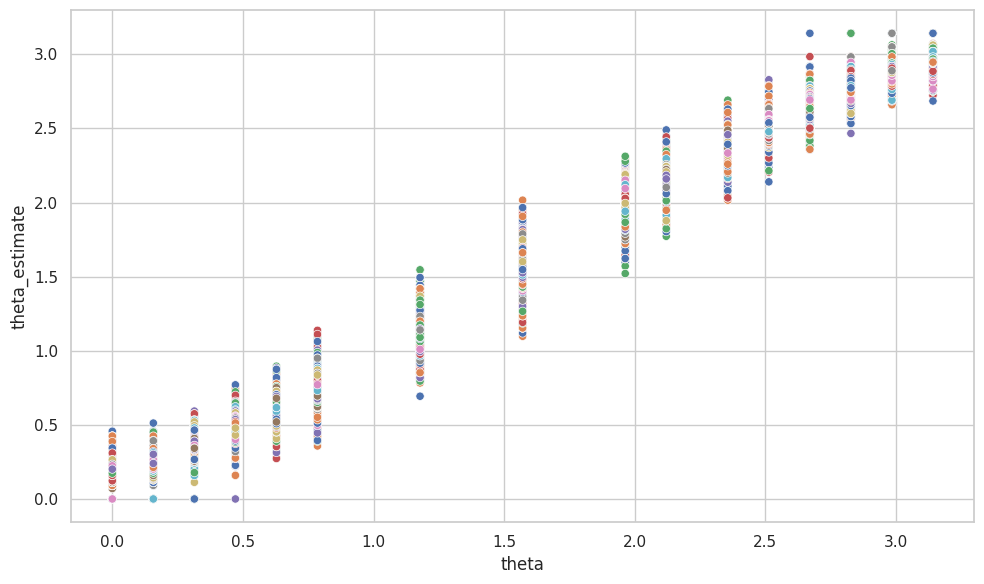

In [8]:
# plot the theta estimate against theta

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta", y="theta_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "theta_estimate_vs_true_theta.png")
plt.savefig(file_name, dpi=300)
plt.show()

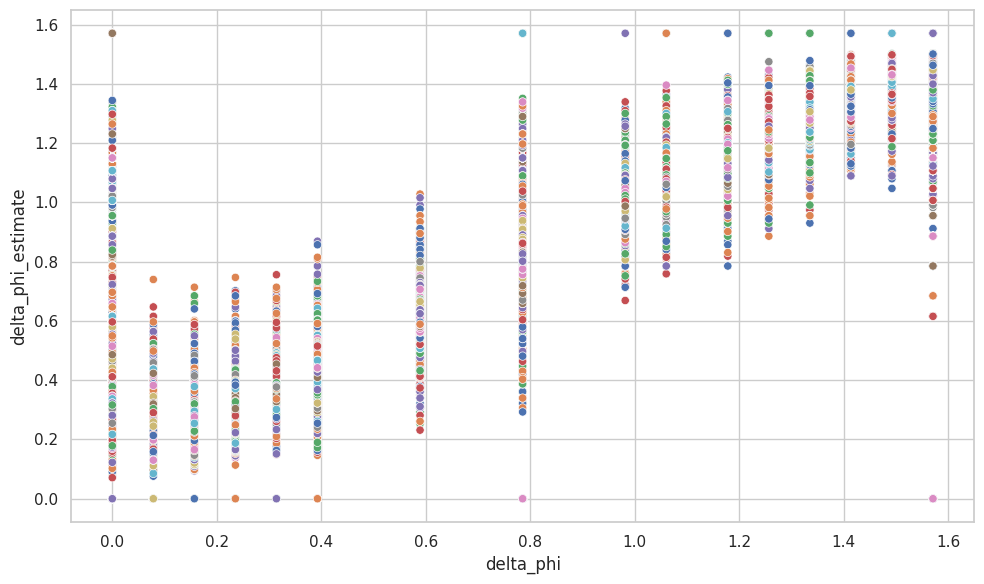

In [9]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="delta_phi", y="delta_phi_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()

# save the figure
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "delta_phi_estimate_vs_true_delta_phi.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [10]:
estimates_summary_df = estimates_df.groupby(["data_dir", "N"]).agg({
    "theta_estimate": ["mean", "std", "var"],
    "delta_phi_estimate": ["mean", "std", "var"],
    "theta": ["mean"],
    "delta_phi": ["mean"]
}).reset_index().rename(columns={"data_dir": "Data Directory"})
estimates_summary_df

Data Directory        N theta_estimate                      \
                                                 mean       std       var   
0     2025-05-30--16h-36m-59s     39.0       0.150162  0.128068  0.016401   
1     2025-05-30--16h-36m-59s     39.5       0.206552  0.068845  0.004740   
2     2025-05-30--16h-36m-59s     40.0       0.143578  0.128784  0.016585   
3     2025-05-30--16h-36m-59s     40.5       0.191769  0.056030  0.003139   
4     2025-05-30--16h-36m-59s     41.0       0.171794  0.122667  0.015047   
...                       ...      ...            ...       ...       ...   
8245  2025-06-01--02h-34m-20s    201.5       1.516105  0.070754  0.005006   
8246  2025-06-01--02h-34m-20s    202.0       1.570798  0.032847  0.001079   
8247  2025-06-01--02h-34m-20s    202.5       1.555970  0.040441  0.001635   
8248  2025-06-01--02h-34m-20s    203.0       1.521515       NaN       NaN   
8249  2025-06-01--02h-34m-20s  17971.0       1.547089       NaN       NaN   

     delta_phi_estimate                         theta delta_phi  
                   mean       std       var      mean      mean  
0              1.467549  0.259308  0.067241  0.000000  0.000000  
1              1.473692  0.343540  0.118020  0.000000  0.000000  
2              1.497492  0.224649  0.050467  0.000000  0.000000  
3              1.531260  0.194560  0.037854  0.000000  0.000000  
4              1.443637  0.264644  0.070036  0.000000  0.000000  
...                 ...       ...       ...       ...       ...  
8245           1.491964  0.014993  0.000225  1.570796  1.570796  
8246           1.451981  0.023439  0.000549  1.570796  1.570796  
8247           1.503847  0.057982  0.003362  1.570796  1.570796  
8248           1.570796       NaN       NaN  1.570796  1.570796  
8249           1.462638       NaN       NaN  1.570796  1.570796  

[8250 rows x 10 columns]

In [11]:
estimates_summary_df["2_n_var"] = estimates_summary_df["N"] * 2 * estimates_summary_df["theta_estimate"]["var"]
estimates_summary_df["theta_error"] = estimates_summary_df["theta_estimate"]["mean"] - estimates_summary_df["theta"]["mean"]
estimates_summary_df["root_n_theta_error"] = np.sqrt(estimates_summary_df["N"]) * estimates_summary_df["theta_error"]
estimates_summary_df

Data Directory        N theta_estimate                      \
                                                 mean       std       var   
0     2025-05-30--16h-36m-59s     39.0       0.150162  0.128068  0.016401   
1     2025-05-30--16h-36m-59s     39.5       0.206552  0.068845  0.004740   
2     2025-05-30--16h-36m-59s     40.0       0.143578  0.128784  0.016585   
3     2025-05-30--16h-36m-59s     40.5       0.191769  0.056030  0.003139   
4     2025-05-30--16h-36m-59s     41.0       0.171794  0.122667  0.015047   
...                       ...      ...            ...       ...       ...   
8245  2025-06-01--02h-34m-20s    201.5       1.516105  0.070754  0.005006   
8246  2025-06-01--02h-34m-20s    202.0       1.570798  0.032847  0.001079   
8247  2025-06-01--02h-34m-20s    202.5       1.555970  0.040441  0.001635   
8248  2025-06-01--02h-34m-20s    203.0       1.521515       NaN       NaN   
8249  2025-06-01--02h-34m-20s  17971.0       1.547089       NaN       NaN   

     delta_phi_estimate                         theta delta_phi   2_n_var  \
                   mean       std       var      mean      mean             
0              1.467549  0.259308  0.067241  0.000000  0.000000  1.279304   
1              1.473692  0.343540  0.118020  0.000000  0.000000  0.374433   
2              1.497492  0.224649  0.050467  0.000000  0.000000  1.326827   
3              1.531260  0.194560  0.037854  0.000000  0.000000  0.254292   
4              1.443637  0.264644  0.070036  0.000000  0.000000  1.233873   
...                 ...       ...       ...       ...       ...       ...   
8245           1.491964  0.014993  0.000225  1.570796  1.570796  2.017468   
8246           1.451981  0.023439  0.000549  1.570796  1.570796  0.435885   
8247           1.503847  0.057982  0.003362  1.570796  1.570796  0.662372   
8248           1.570796       NaN       NaN  1.570796  1.570796       NaN   
8249           1.462638       NaN       NaN  1.570796  1.570796       NaN   

     theta_error root_n_theta_error  
                                     
0       0.150162           0.937763  
1       0.206552           1.298157  
2       0.143578           0.908066  
3       0.191769           1.220409  
4       0.171794           1.100018  
...          ...                ...  
8245   -0.054691          -0.776343  
8246    0.000002           0.000028  
8247   -0.014826          -0.210977  
8248   -0.049281          -0.702147  
8249   -0.023707          -3.178075  

[8250 rows x 13 columns]

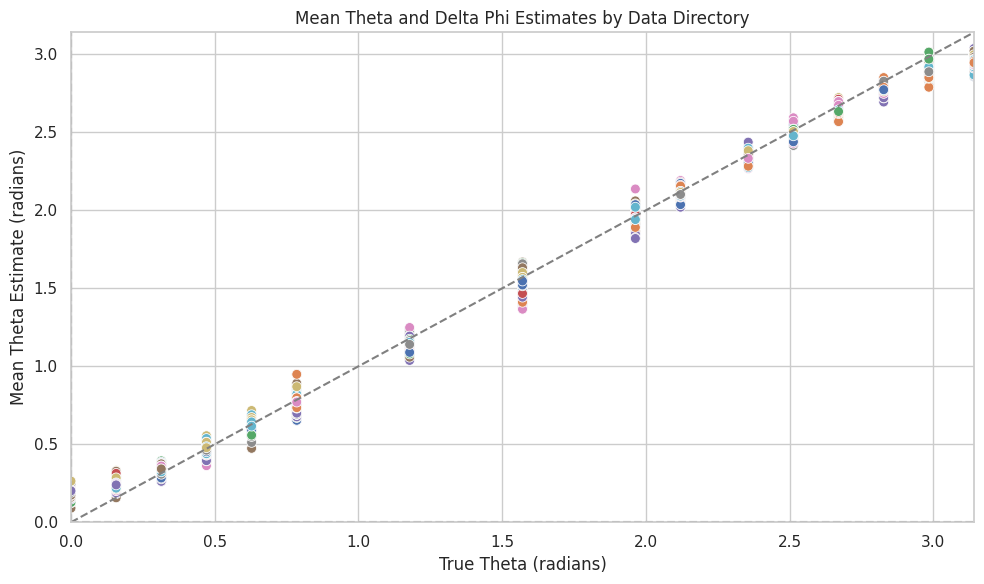

In [12]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_estimate", "mean"),
                hue="N", palette="deep", s=50)
plt.title("Mean Theta and Delta Phi Estimates by Data Directory")
plt.xlabel("True Theta (radians)")
plt.ylabel("Mean Theta Estimate (radians)")
plt.axline((0, 0), slope=1, color='gray', linestyle='--')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

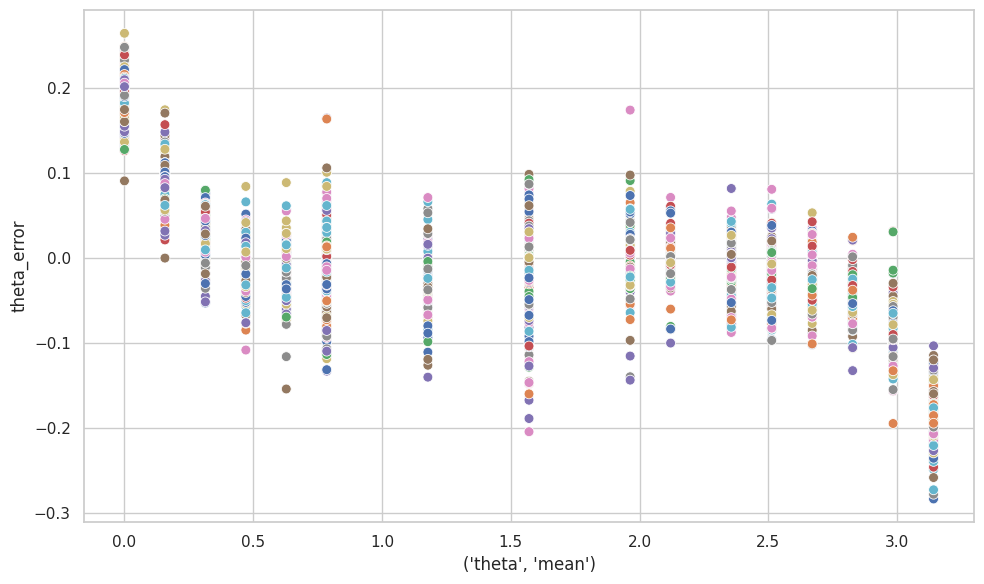

In [13]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [14]:
fixed_n_estimates_summary_df = estimates_summary_df[estimates_summary_df["N"].isin([40, 80, 120, 160, 200])].reset_index(drop=True)
fixed_n_estimates_summary_df

Data Directory      N theta_estimate                      \
                                              mean       std       var   
0    2025-05-30--16h-36m-59s   40.0       0.143578  0.128784  0.016585   
1    2025-05-30--16h-36m-59s   80.0       0.178726  0.058437  0.003415   
2    2025-05-30--16h-36m-59s  120.0       0.196730  0.032708  0.001070   
3    2025-05-30--16h-36m-59s  160.0       0.205406  0.048222  0.002325   
4    2025-05-30--16h-36m-59s  200.0       0.188314  0.029639  0.000878   
..                       ...    ...            ...       ...       ...   
745  2025-06-01--02h-34m-20s   40.0       1.547114  0.114332  0.013072   
746  2025-06-01--02h-34m-20s   80.0       1.546594  0.056310  0.003171   
747  2025-06-01--02h-34m-20s  120.0       1.553033  0.055997  0.003136   
748  2025-06-01--02h-34m-20s  160.0       1.570278  0.044886  0.002015   
749  2025-06-01--02h-34m-20s  200.0       1.546544  0.044471  0.001978   

    delta_phi_estimate                         theta delta_phi   2_n_var  \
                  mean       std       var      mean      mean             
0             1.497492  0.224649  0.050467  0.000000  0.000000  1.326827   
1             1.521381  0.169982  0.028894  0.000000  0.000000  0.546377   
2             1.492119  0.180993  0.032758  0.000000  0.000000  0.256754   
3             1.455727  0.199969  0.039988  0.000000  0.000000  0.744108   
4             1.453551  0.184640  0.034092  0.000000  0.000000  0.351396   
..                 ...       ...       ...       ...       ...       ...   
745           1.519908  0.079270  0.006284  1.570796  1.570796  1.045740   
746           1.492020  0.073993  0.005475  1.570796  1.570796  0.507334   
747           1.493097  0.065441  0.004283  1.570796  1.570796  0.752571   
748           1.463024  0.059313  0.003518  1.570796  1.570796  0.644721   
749           1.478416  0.068778  0.004730  1.570796  1.570796  0.791061   

    theta_error root_n_theta_error  
                                    
0      0.143578           0.908066  
1      0.178726           1.598574  
2      0.196730           2.155070  
3      0.205406           2.598199  
4      0.188314           2.663163  
..          ...                ...  
745   -0.023682          -0.149781  
746   -0.024203          -0.216475  
747   -0.017763          -0.194585  
748   -0.000518          -0.006554  
749   -0.024252          -0.342979  

[750 rows x 13 columns]

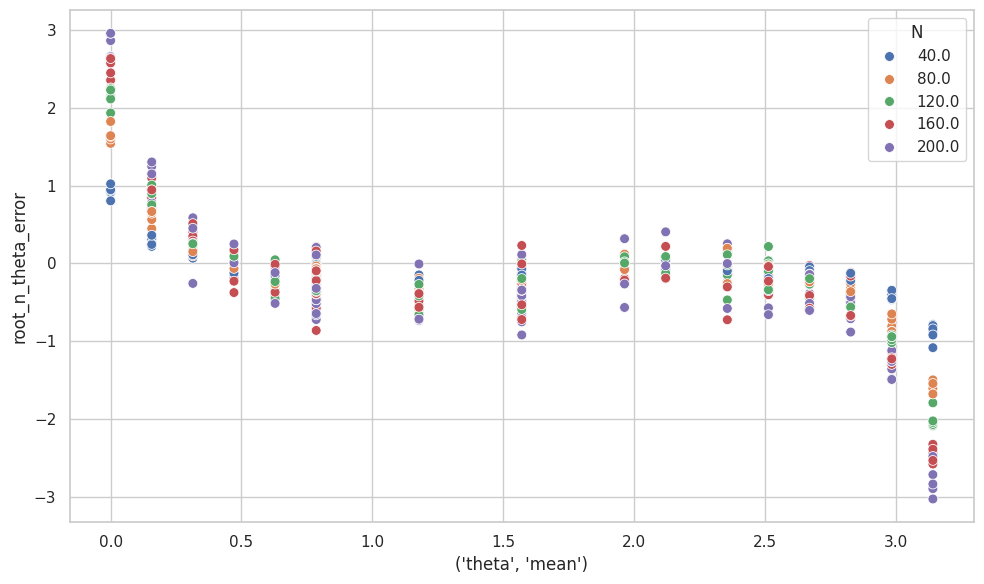

In [15]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_estimates_summary_df, x=("theta", "mean"),
                y=("root_n_theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

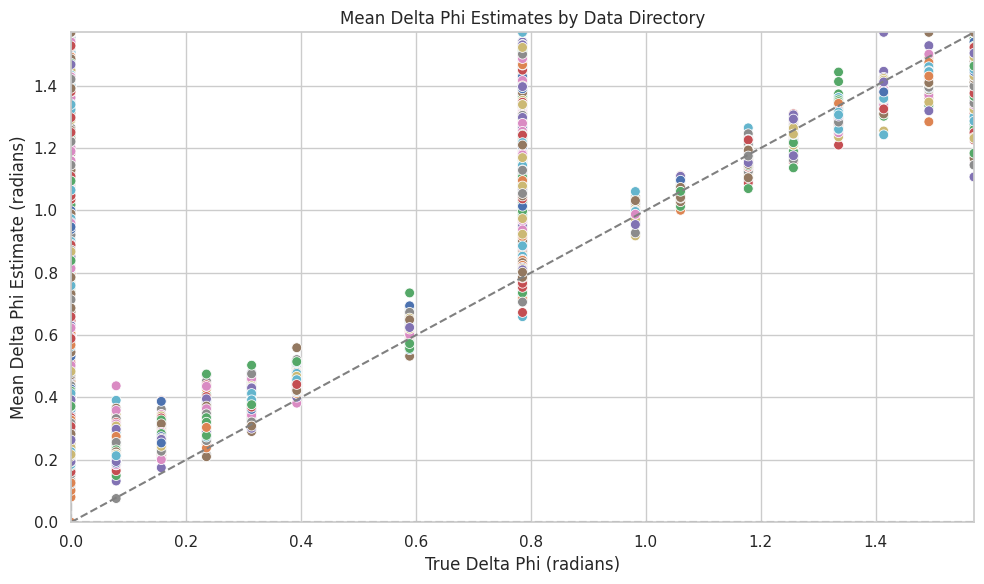

In [16]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("delta_phi", "mean"),
                y=("delta_phi_estimate", "mean"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)
plt.title("Mean Delta Phi Estimates by Data Directory")
plt.xlabel("True Delta Phi (radians)")
plt.ylabel("Mean Delta Phi Estimate (radians)")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

plt.axline((0, 0), slope=1, color='gray', linestyle='--')

plt.xlim(0, np.pi/2)
plt.ylim(0, np.pi/2)

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_theta_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

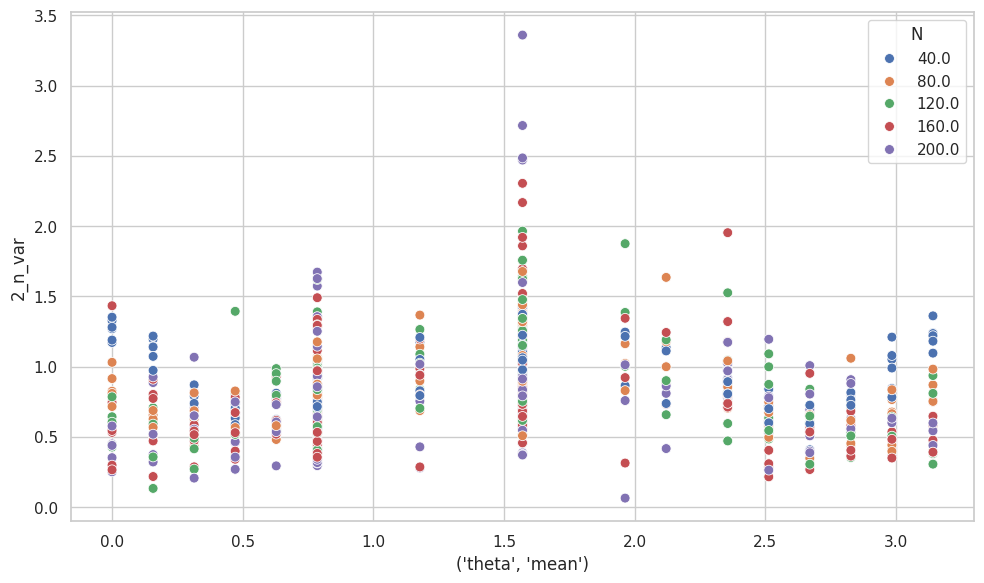

In [17]:
# plot the variances against the true value of theta as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_estimates_summary_df, x=("theta", "mean"), y=("2_n_var"),
                hue=fixed_n_estimates_summary_df["N"].astype(str),
                palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "variance_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

# Best guess estimators 

Using all samples in the data_dir to estimate

In [18]:
# Row of max N in each data_dir
estimates_summary_df["max_N"] = estimates_summary_df.groupby("Data Directory")["N"].transform("max")
# Filter to keep only the rows with the maximum N for each data_dir
best_guess_estimators = estimates_summary_df[estimates_summary_df["N"] == estimates_summary_df["max_N"]].reset_index(drop=True)

best_guess_estimators


Data Directory        N theta_estimate          \
                                                mean std var   
0    2025-05-30--16h-36m-59s  18782.5       0.203217 NaN NaN   
1    2025-05-30--16h-47m-54s  18642.5       0.245836 NaN NaN   
2    2025-05-30--16h-59m-13s  18635.5       0.340596 NaN NaN   
3    2025-05-30--17h-10m-25s  18218.5       0.453745 NaN NaN   
4    2025-05-30--17h-21m-43s  18457.0       0.614172 NaN NaN   
..                       ...      ...            ...  ..  ..   
145  2025-06-01--01h-48m-47s  17739.5       1.528731 NaN NaN   
146  2025-06-01--02h-00m-02s  17768.5       1.542034 NaN NaN   
147  2025-06-01--02h-11m-24s  17899.0       1.541237 NaN NaN   
148  2025-06-01--02h-23m-04s  17708.0       1.546398 NaN NaN   
149  2025-06-01--02h-34m-20s  17971.0       1.547089 NaN NaN   

    delta_phi_estimate             theta delta_phi 2_n_var theta_error  \
                  mean std var      mean      mean                       
0             1.338406 NaN NaN  0.000000  0.000000     NaN    0.203217   
1             0.925543 NaN NaN  0.157080  0.000000     NaN    0.088756   
2             0.613786 NaN NaN  0.314159  0.000000     NaN    0.026436   
3             0.452637 NaN NaN  0.471239  0.000000     NaN   -0.017493   
4             0.352671 NaN NaN  0.628319  0.000000     NaN   -0.014147   
..                 ...  ..  ..       ...       ...     ...         ...   
145           1.244591 NaN NaN  1.570796  1.256637     NaN   -0.042065   
146           1.306207 NaN NaN  1.570796  1.335177     NaN   -0.028763   
147           1.379628 NaN NaN  1.570796  1.413717     NaN   -0.029559   
148           1.430359 NaN NaN  1.570796  1.492257     NaN   -0.024398   
149           1.462638 NaN NaN  1.570796  1.570796     NaN   -0.023707   

    root_n_theta_error    max_N  
                                 
0            27.850776  18782.5  
1            12.118531  18642.5  
2             3.608874  18635.5  
3            -2.361194  18218.5  
4            -1.921903  18457.0  
..                 ...      ...  
145          -5.602685  17739.5  
146          -3.834029  17768.5  
147          -3.954618  17899.0  
148          -3.246699  17708.0  
149          -3.178075  17971.0  

[150 rows x 14 columns]

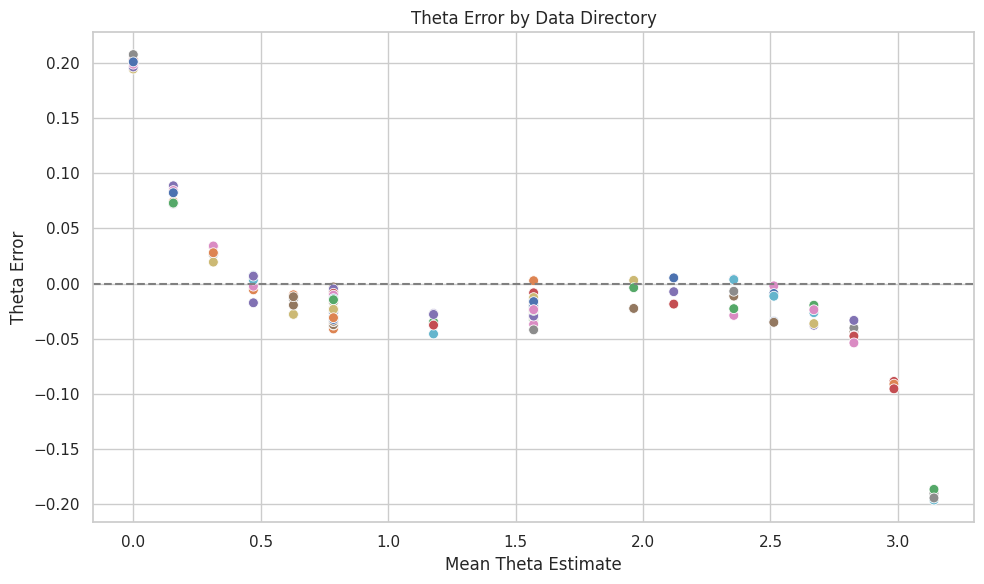

In [19]:
# plot the theta_error
plt.figure(figsize=(10, 6))
sns.scatterplot(data=best_guess_estimators, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)
plt.title("Theta Error by Data Directory")
plt.xlabel("Mean Theta Estimate")
plt.ylabel("Theta Error")
plt.axhline(0, color='gray', linestyle='--')

plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "best_guess_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)

plt.show()

In [20]:
best_guess_estimators

# flatten the best_guess_estimators DataFrame
best_guess_estimators_flat = best_guess_estimators.copy()
best_guess_estimators_flat.columns = ['_'.join(col).strip() for col in best_guess_estimators_flat.columns.values]
best_guess_estimators_flat

,Data Directory_,N_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,theta_mean,delta_phi_mean,2_n_var_,theta_error_,root_n_theta_error_,max_N_
0,2025-05-30--16h-36m-59s,18782.5,0.203217,NaN,NaN,1.338406,NaN,NaN,0.000000,0.000000,NaN,0.203217,27.850776,18782.5
1,2025-05-30--16h-47m-54s,18642.5,0.245836,NaN,NaN,0.925543,NaN,NaN,0.157080,0.000000,NaN,0.088756,12.118531,18642.5
2,2025-05-30--16h-59m-13s,18635.5,0.340596,NaN,NaN,0.613786,NaN,NaN,0.314159,0.000000,NaN,0.026436,3.608874,18635.5
3,2025-05-30--17h-10m-25s,18218.5,0.453745,NaN,NaN,0.452637,NaN,NaN,0.471239,0.000000,NaN,-0.017493,-2.361194,18218.5
4,2025-05-30--17h-21m-43s,18457.0,0.614172,NaN,NaN,0.352671,NaN,NaN,0.628319,0.000000,NaN,-0.014147,-1.921903,18457.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2025-06-01--01h-48m-47s,17739.5,1.528731,NaN,NaN,1.244591,NaN,NaN,1.570796,1.256637,NaN,-0.042065,-5.602685,17739.5
146,2025-06-01--02h-00m-02s,17768.5,1.542034,NaN,NaN,1.306207,NaN,NaN,1.570796,1.335177,NaN,-0.028763,-3.834029,17768.5
147,2025-06-01--02h-11m-24s,17899.0,1.541237,NaN,NaN,1.379628,NaN,NaN,1.570796,1.413717,NaN,-0.029559,-3.954618,17899.0
148,2025-06-01--02h-23m-04s,17708.0,1.546398,NaN,NaN,1.430359,NaN,NaN,1.570796,1.492257,NaN,-0.024398,-3.246699,17708.0


In [21]:
known_theta_offset = best_guess_estimators_flat.groupby("theta_mean").agg({
    "theta_estimate_mean": ["mean"],
}).reset_index().rename(columns={"theta_mean": "True Theta (radians)"})

known_theta_offset.columns = ["prepared_theta", "best_guess_estimator_theta"]
known_theta_offset

,prepared_theta,best_guess_estimator_theta
0,0.000000,0.200494
1,0.157080,0.236326
2,0.314159,0.342139
3,0.471239,0.469847
4,0.628319,0.609681
5,0.785398,0.765017
6,1.178097,1.143265
7,1.570796,1.546932
8,1.963495,1.955649
9,2.120575,2.113590


In [22]:
# flatten the fixed_n_estimates_summary_df
fixed_n_estimates_summary_df_flat = fixed_n_estimates_summary_df.copy()
fixed_n_estimates_summary_df_flat.columns = ['_'.join(col).strip() for col in fixed_n_estimates_summary_df_flat.columns.values]

fixed_n_estimates_summary_df_flat["theta_mean"] = np.round(fixed_n_estimates_summary_df_flat["theta_mean"].astype(float), 4)
known_theta_offset["prepared_theta"] = np.round(known_theta_offset["prepared_theta"].astype(float), 4)

# join the known_theta_offset with the fixed_n_estimates_summary_df
fixed_n_theta_offsets = fixed_n_estimates_summary_df_flat.merge(known_theta_offset, 
                                        left_on="theta_mean",
                                        right_on="prepared_theta",
)

fixed_n_theta_offsets = fixed_n_theta_offsets.drop(columns=["prepared_theta"])
fixed_n_theta_offsets

,Data Directory_,N_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,theta_mean,delta_phi_mean,2_n_var_,theta_error_,root_n_theta_error_,best_guess_estimator_theta
0,2025-05-30--16h-36m-59s,40.0,0.143578,0.128784,0.016585,1.497492,0.224649,0.050467,0.0000,0.000000,1.326827,0.143578,0.908066,0.200494
1,2025-05-30--16h-36m-59s,80.0,0.178726,0.058437,0.003415,1.521381,0.169982,0.028894,0.0000,0.000000,0.546377,0.178726,1.598574,0.200494
2,2025-05-30--16h-36m-59s,120.0,0.196730,0.032708,0.001070,1.492119,0.180993,0.032758,0.0000,0.000000,0.256754,0.196730,2.155070,0.200494
3,2025-05-30--16h-36m-59s,160.0,0.205406,0.048222,0.002325,1.455727,0.199969,0.039988,0.0000,0.000000,0.744108,0.205406,2.598199,0.200494
4,2025-05-30--16h-36m-59s,200.0,0.188314,0.029639,0.000878,1.453551,0.184640,0.034092,0.0000,0.000000,0.351396,0.188314,2.663163,0.200494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2025-06-01--02h-34m-20s,40.0,1.547114,0.114332,0.013072,1.519908,0.079270,0.006284,1.5708,1.570796,1.045740,-0.023682,-0.149781,1.546932
746,2025-06-01--02h-34m-20s,80.0,1.546594,0.056310,0.003171,1.492020,0.073993,0.005475,1.5708,1.570796,0.507334,-0.024203,-0.216475,1.546932
747,2025-06-01--02h-34m-20s,120.0,1.553033,0.055997,0.003136,1.493097,0.065441,0.004283,1.5708,1.570796,0.752571,-0.017763,-0.194585,1.546932
748,2025-06-01--02h-34m-20s,160.0,1.570278,0.044886,0.002015,1.463024,0.059313,0.003518,1.5708,1.570796,0.644721,-0.000518,-0.006554,1.546932


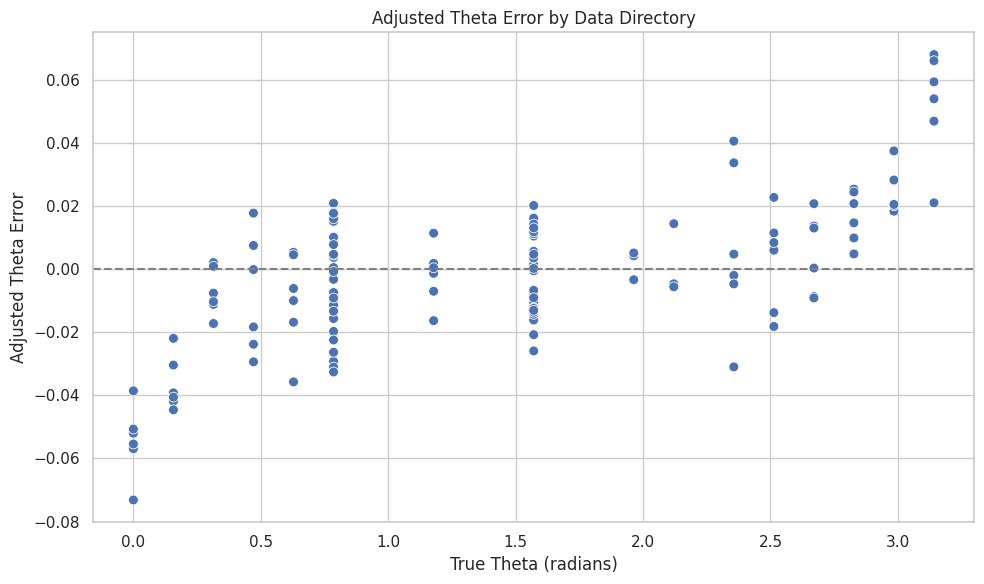

In [23]:
fixed_n_theta_offsets["adjusted_theta_error"] = (fixed_n_theta_offsets["theta_estimate_mean"] - fixed_n_theta_offsets["best_guess_estimator_theta"])
# plot the adjusted theta error
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_theta_offsets[fixed_n_theta_offsets["N_"].isin([40])],
                x="theta_mean",
                y="adjusted_theta_error",
                hue=fixed_n_theta_offsets["N_"].astype(str),
                palette="deep", s=50)
plt.title("Adjusted Theta Error by Data Directory")
plt.xlabel("True Theta (radians)")
plt.ylabel("Adjusted Theta Error")
plt.axhline(0, color='gray', linestyle='--')
plt.legend([], [], frameon=False)
plt.tight_layout()

plt.show()

In [42]:
adjusted_theta_offsets_for_plot = fixed_n_theta_offsets.groupby(["theta_mean", "N_"]).agg({
    "adjusted_theta_error": ["mean", "std", "var"],
    "theta_estimate_mean": ["mean", "std", "var"],
    "best_guess_estimator_theta": ["mean", "std", "var"]
}).reset_index().rename(columns={"theta_mean": "True Theta (radians)"})
adjusted_theta_offsets_for_plot["normalised_adjusted_theta_error"] = adjusted_theta_offsets_for_plot["adjusted_theta_error"]["mean"] * np.sqrt(adjusted_theta_offsets_for_plot["N_"]) 
adjusted_theta_offsets_for_plot["normalised_adjusted_theta_error_std"] = adjusted_theta_offsets_for_plot["adjusted_theta_error"]["std"] * np.sqrt(adjusted_theta_offsets_for_plot["N_"])
adjusted_theta_offsets_for_plot

True Theta (radians)     N_ adjusted_theta_error                      \
                                               mean       std       var   
0                0.0000   40.0            -0.054471  0.011210  0.000126   
1                0.0000   80.0            -0.016941  0.010842  0.000118   
2                0.0000  120.0            -0.005471  0.010211  0.000104   
3                0.0000  160.0            -0.004384  0.011885  0.000141   
4                0.0000  200.0            -0.004011  0.012176  0.000148   
..                  ...    ...                  ...       ...       ...   
75               3.1416   40.0             0.052473  0.017282  0.000299   
76               3.1416   80.0             0.013854  0.008040  0.000065   
77               3.1416  120.0             0.008069  0.010322  0.000107   
78               3.1416  160.0            -0.002384  0.007544  0.000057   
79               3.1416  200.0            -0.002073  0.015078  0.000227   

   theta_estimate_mean                     best_guess_estimator_theta       \
                  mean       std       var                       mean  std   
0             0.146023  0.011210  0.000126                   0.200494  0.0   
1             0.183554  0.010842  0.000118                   0.200494  0.0   
2             0.195023  0.010211  0.000104                   0.200494  0.0   
3             0.196110  0.011885  0.000141                   0.200494  0.0   
4             0.196483  0.012176  0.000148                   0.200494  0.0   
..                 ...       ...       ...                        ...  ...   
75            3.001618  0.017282  0.000299                   2.949145  0.0   
76            2.962999  0.008040  0.000065                   2.949145  0.0   
77            2.957214  0.010322  0.000107                   2.949145  0.0   
78            2.946762  0.007544  0.000057                   2.949145  0.0   
79            2.947073  0.015078  0.000227                   2.949145  0.0   

        normalised_adjusted_theta_error normalised_adjusted_theta_error_std  
    var                                                                      
0   0.0                       -0.344505                            0.070899  
1   0.0                       -0.151521                            0.096974  
2   0.0                       -0.059927                            0.111856  
3   0.0                       -0.055459                            0.150333  
4   0.0                       -0.056724                            0.172192  
..  ...                             ...                                 ...  
75  0.0                        0.331869                            0.109300  
76  0.0                        0.123911                            0.071908  
77  0.0                        0.088389                            0.113073  
78  0.0                       -0.030153                            0.095430  
79  0.0                       -0.029314                            0.213233  

[80 rows x 13 columns]

0     0.070899
1     0.096974
2     0.111856
3     0.150333
4     0.172192
        ...   
75    0.109300
76    0.071908
77    0.113073
78    0.095430
79    0.213233
Name: normalised_adjusted_theta_error_std, Length: 80, dtype: float64

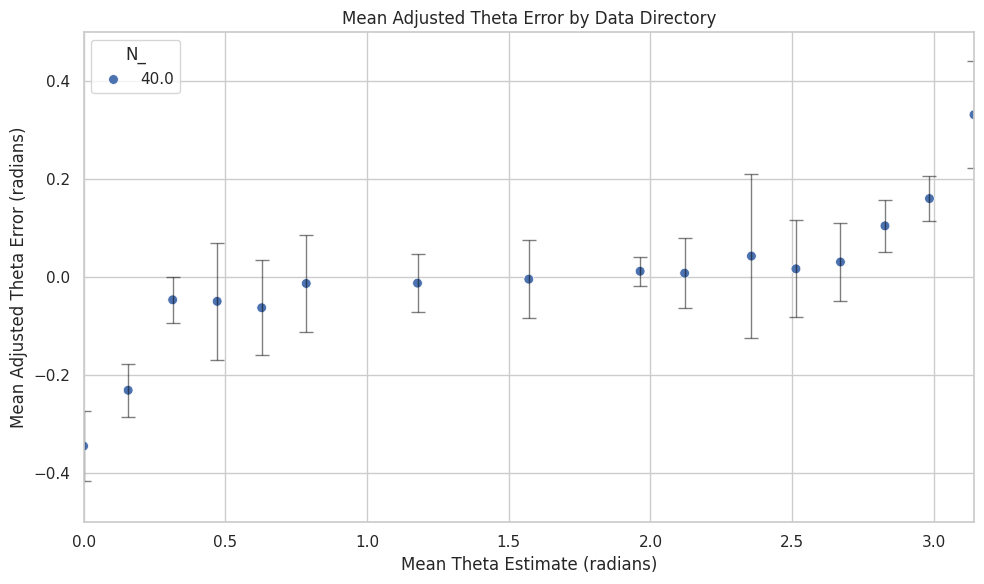

In [56]:
subset = adjusted_theta_offsets_for_plot[adjusted_theta_offsets_for_plot["N_"].isin([40])]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=subset,
    x="True Theta (radians)",
    y="normalised_adjusted_theta_error",
    hue=subset["N_"].astype(str),
    palette="deep",
    s=50
)

plt.errorbar(
    subset["True Theta (radians)"],
    subset["normalised_adjusted_theta_error"],
    yerr=subset["normalised_adjusted_theta_error_std"],
    fmt='none',  # Do not plot lines or markers
    ecolor='black',
    capsize=5,
    elinewidth=1,
    alpha=0.5
)

plt.title("Mean Adjusted Theta Error by Data Directory")
plt.xlabel("Mean Theta Estimate (radians)")
plt.ylabel("Mean Adjusted Theta Error (radians)")
plt.xlim(0, np.pi)
plt.ylim(-0.5, 0.5)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_adjusted_theta_error_by_data_dir.png")
# plt.savefig(file_name, dpi=300)
plt.show()